In [ ]:
pip uninstall dlib 

Found existing installation: dlib 19.18.0
Uninstalling dlib-19.18.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/dlib-19.18.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/dlib.cpython-37m-x86_64-linux-gnu.so
Proceed (y/n)? y
yy
  Successfully uninstalled dlib-19.18.0


In [ ]:
!git clone https://github.com/davisking/dlib.git

Cloning into 'dlib'...
remote: Enumerating objects: 49338, done.
remote: Counting objects: 100% (158/158), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 49338 (delta 68), reused 84 (delta 49), pack-reused 49180
Receiving objects: 100% (49338/49338), 24.52 MiB | 4.85 MiB/s, done.
Resolving deltas: 100% (34680/34680), done.


In [ ]:
cd dlib

/content/dlib


In [ ]:
!mkdir build

In [ ]:
cd build

/content/dlib/build


In [ ]:
!cmake .. -DDLIB_USE_CUDA=0 -DUSE_AVX_INSTRUCTIONS=1

-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Using CMake version: 3.12.0
-- Compiling dlib version: 19.22.99
-- Enabling AVX instructions
-- Looking for pthread.h
-- Looking for pthread.h - found
-- Looking for pthread_create
-- Looking for pthread_create - not found
-- Looking for pthread_create in pthreads
-- Looking for pthread_create in pthreads - not found
-- Looking for pthread_create in pthread
-- Looking for pthread_create in pthread - 

In [ ]:
!cmake --build .

Scanning dependencies of target dlib
[  1%] Building CXX object dlib/CMakeFiles/dlib.dir/base64/base64_kernel_1.cpp.o
[  3%] Building CXX object dlib/CMakeFiles/dlib.dir/bigint/bigint_kernel_1.cpp.o
[  5%] Building CXX object dlib/CMakeFiles/dlib.dir/bigint/bigint_kernel_2.cpp.o
[  6%] Building CXX object dlib/CMakeFiles/dlib.dir/bit_stream/bit_stream_kernel_1.cpp.o
[  8%] Building CXX object dlib/CMakeFiles/dlib.dir/entropy_decoder/entropy_decoder_kernel_1.cpp.o
[ 10%] Building CXX object dlib/CMakeFiles/dlib.dir/entropy_decoder/entropy_decoder_kernel_2.cpp.o
[ 11%] Building CXX object dlib/CMakeFiles/dlib.dir/entropy_encoder/entropy_encoder_kernel_1.cpp.o
[ 13%] Building CXX object dlib/CMakeFiles/dlib.dir/entropy_encoder/entropy_encoder_kernel_2.cpp.o
[ 15%] Building CXX object dlib/CMakeFiles/dlib.dir/md5/md5_kernel_1.cpp.o
[ 16%] Building CXX object dlib/CMakeFiles/dlib.dir/tokenizer/tokenizer_kernel_1.cpp.o
[ 18%] Building CXX object dlib/CMakeFiles/dlib.dir/unicode/unicode.cpp.o

In [ ]:
cd ..

/content/dlib


In [ ]:
!ls

build		dlib  examples		 LICENSE.txt  python_examples  setup.py
CMakeLists.txt	docs  ISSUE_TEMPLATE.md  MANIFEST.in  README.md        tools


In [ ]:
!python setup.py install --no DLIB_USE_CUDA

running install
running bdist_egg
running egg_info
creating tools/python/dlib.egg-info
writing tools/python/dlib.egg-info/PKG-INFO
writing dependency_links to tools/python/dlib.egg-info/dependency_links.txt
writing top-level names to tools/python/dlib.egg-info/top_level.txt
writing manifest file 'tools/python/dlib.egg-info/SOURCES.txt'
package init file 'tools/python/dlib/__init__.py' not found (or not a regular file)
reading manifest template 'MANIFEST.in'
no previously-included directories found matching 'tools/python/build*'
no previously-included directories found matching 'dlib/cmake_utils/*/build*'
adding license file 'LICENSE.txt'
writing manifest file 'tools/python/dlib.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
running build_ext
Building extension for Python 3.7.12 (default, Sep 10 2021, 00:21:48) 
Invoking CMake setup: 'cmake /content/dlib/tools/python -DCMAKE_LIBRARY_OUTPUT_DIRECTORY=/content/dlib/build/

**Теперь нужно перезапустить среду выполнения!!!**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import dlib
from skimage import io
from scipy.spatial import distance

In [ ]:
dlib.DLIB_USE_CUDA

True

In [ ]:
sp = dlib.shape_predictor('/content/drive/My Drive/shape_predictor_68_face_landmarks.dat')
facerec = dlib.face_recognition_model_v1('/content/drive/My Drive/dlib_face_recognition_resnet_model_v1.dat')
detector = dlib.get_frontal_face_detector()

In [ ]:
dlib.__version__

'19.18.0'

In [ ]:
img     = io.imread('/content/drive/My Drive/1.jpg')
img_src = io.imread('/content/drive/My Drive/1.jpg')


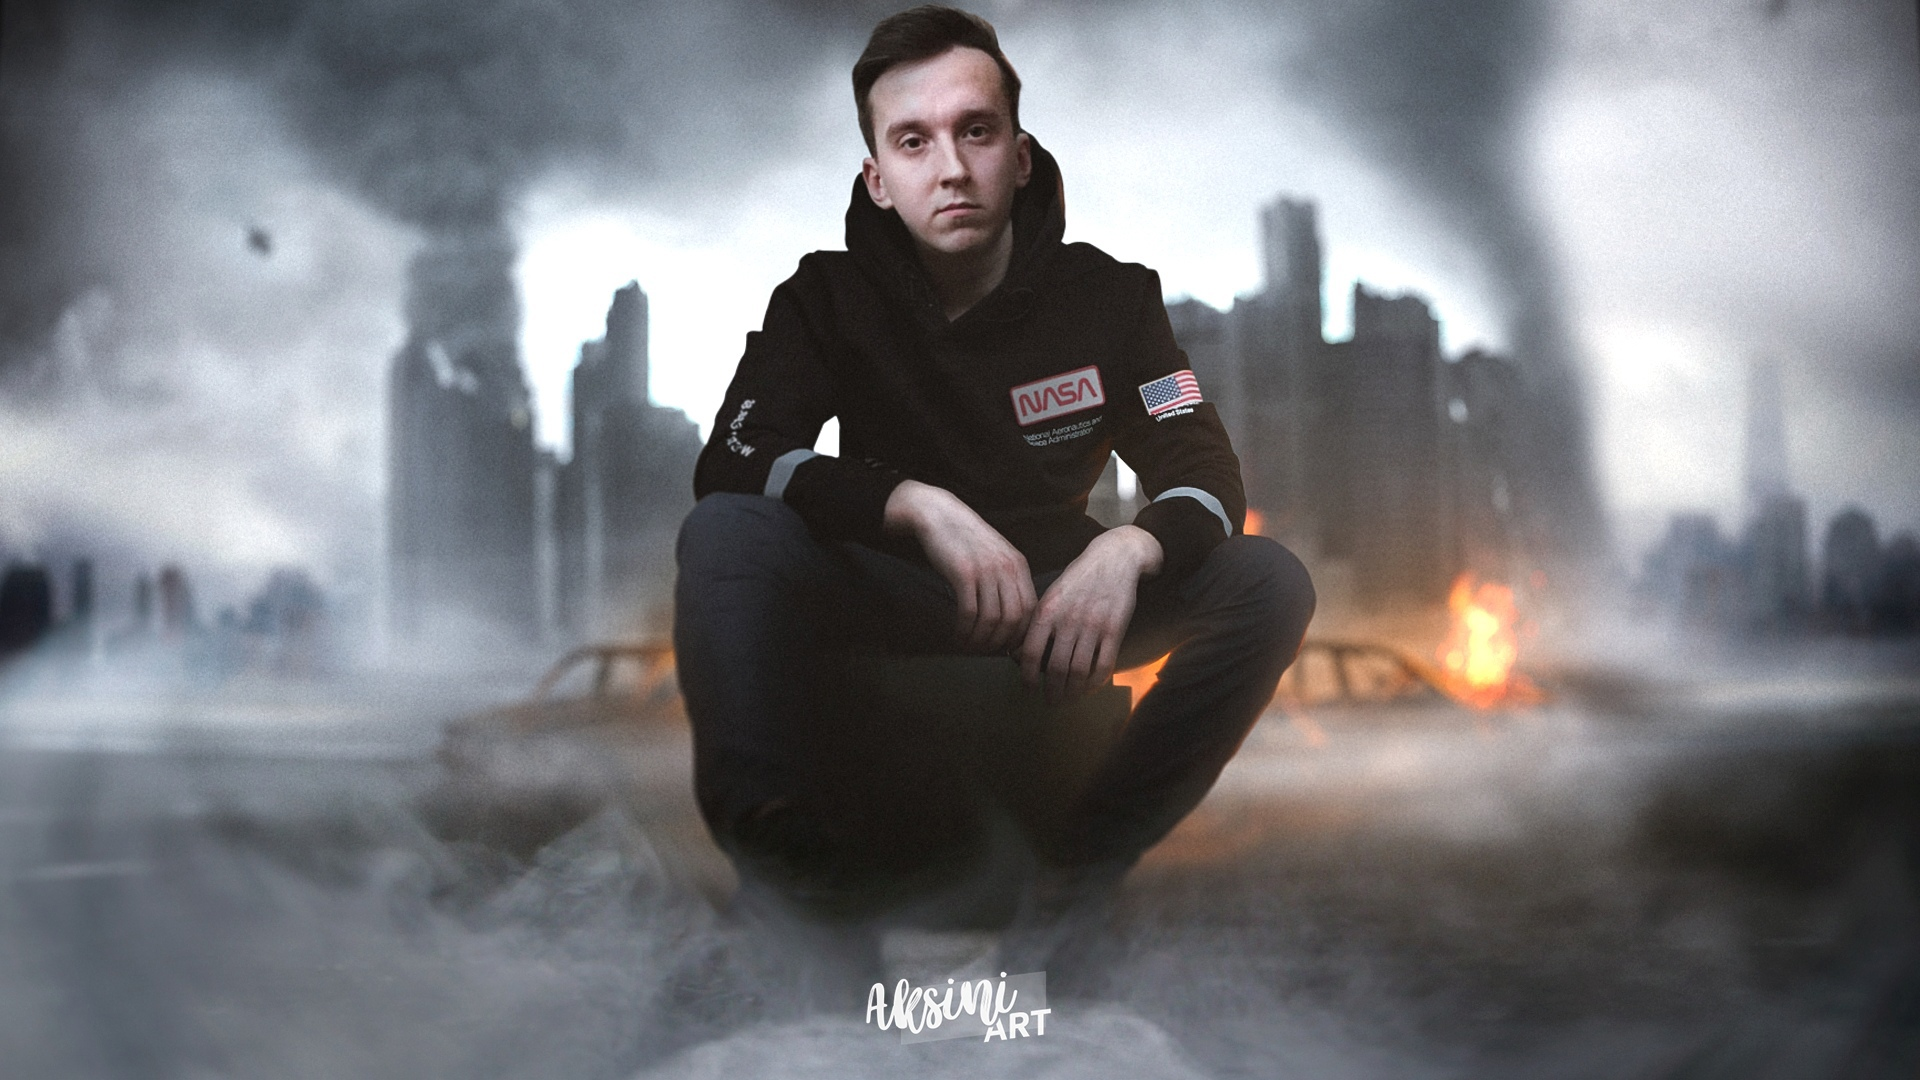

In [ ]:
from IPython.display import Image
Image('/content/drive/My Drive/1.jpg')

In [ ]:
dets = detector(img_src, 1)

In [ ]:
dets[0].left()

872

In [ ]:
for k, d in enumerate(dets):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        k, d.left(), d.top(), d.right(), d.bottom()))
    
shape = sp(img_src, d)    

Detection 0: Left: 872 Top: 98 Right: 1027 Bottom: 253


In [ ]:
shape

In [ ]:
import cv2

In [ ]:
import numpy as np
def shape_to_np(shape, dtype="int"):
	# initialize the list of (x, y)-coordinates
	coords = np.zeros((68, 2), dtype=dtype)
	# loop over the 68 facial landmarks and convert them
	# to a 2-tuple of (x, y)-coordinates
	for i in range(0, 68):
		coords[i] = (shape.part(i).x, shape.part(i).y)
	# return the list of (x, y)-coordinates
	return coords

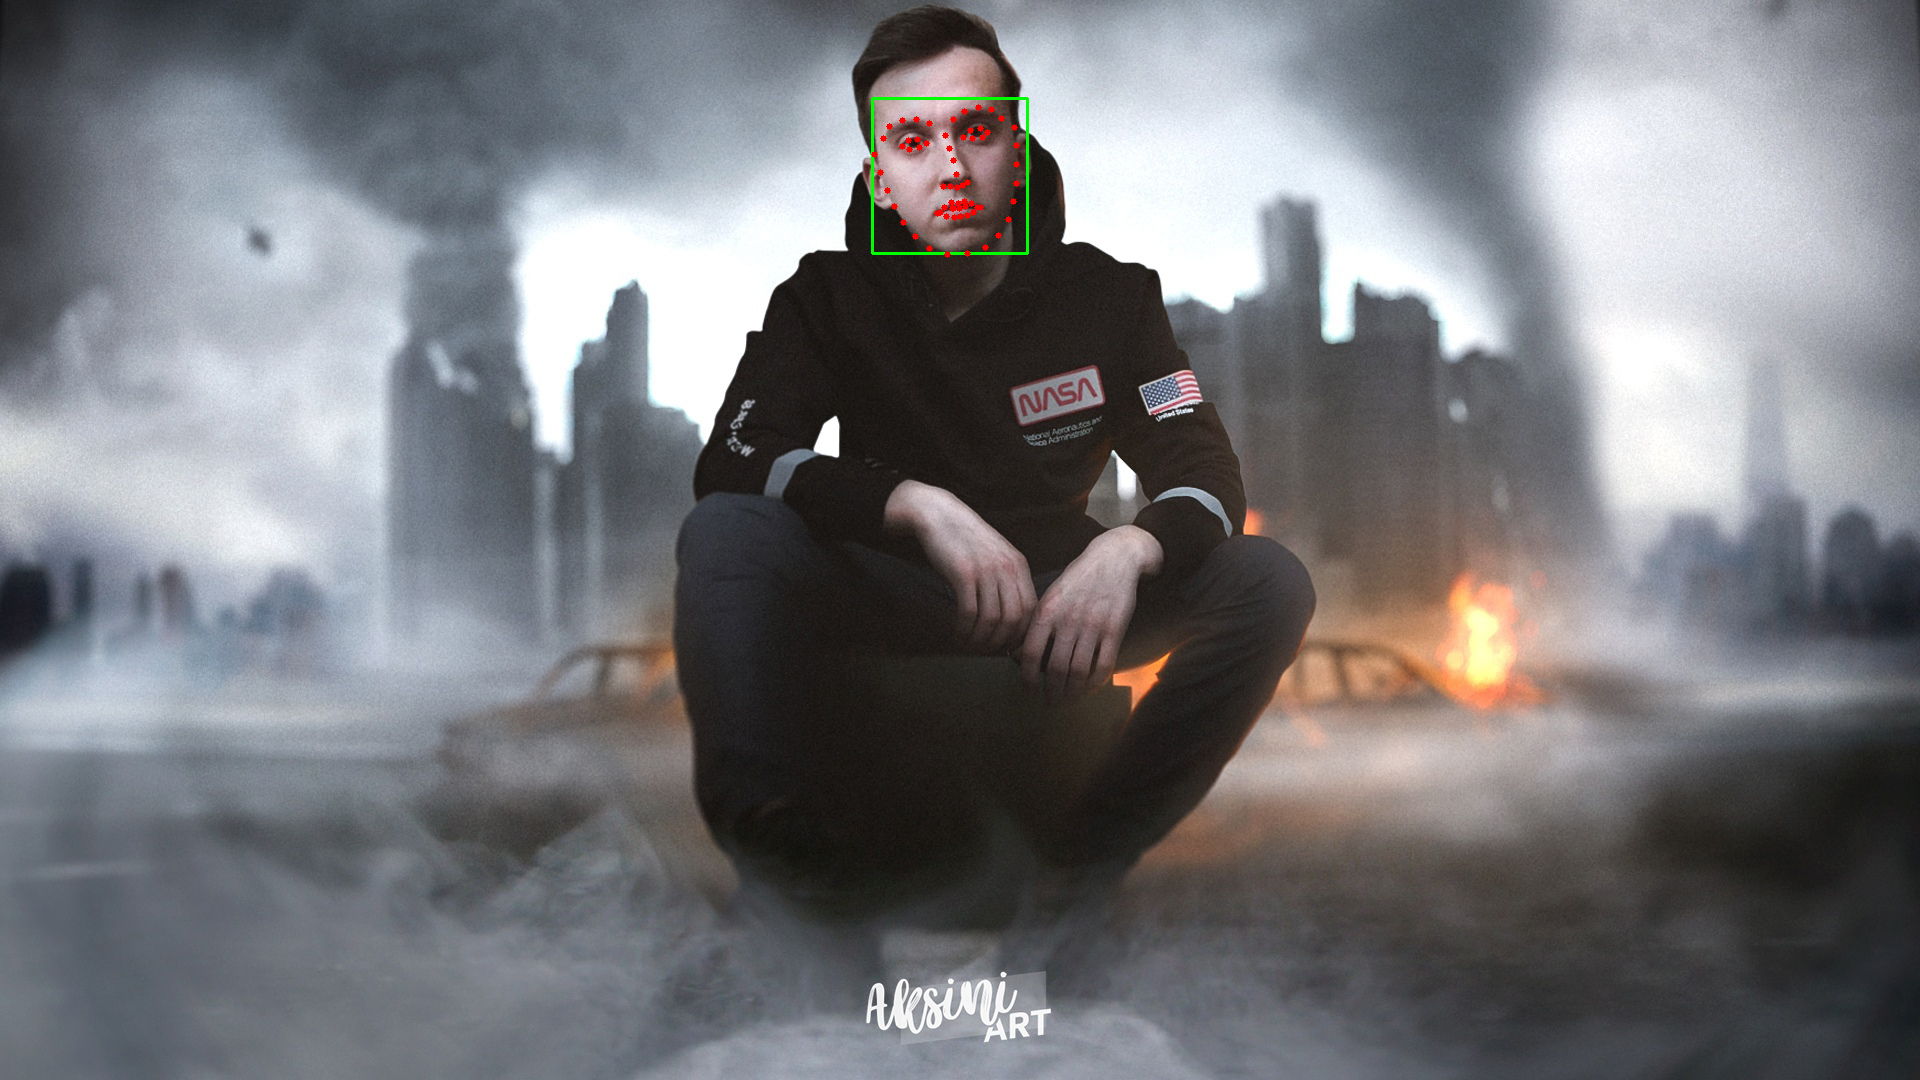

In [ ]:
from google.colab.patches import cv2_imshow
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.rectangle(img, (dets[0].left(), dets[0].top()), (dets[0].right(), dets[0].bottom()), (0, 255, 0, 255), 2)

shapex = shape_to_np(shape)

for (x, y) in shapex:
		cv2.circle(img, (x, y), 3, (0, 0, 255), -1)

cv2_imshow(img)

In [ ]:
face_descriptor1 = facerec.compute_face_descriptor(img_src, shape)

In [ ]:
face_descriptor1

dlib.vector([-0.0459567, 0.0973349, 0.0608743, -0.0298161, -0.13859, 0.0467615, -0.0356653, -0.0584688, 0.0846284, -0.177284, 0.214047, -0.112167, -0.266105, 0.062542, 0.00840547, 0.135445, -0.137798, -0.0792883, -0.144483, -0.156024, 0.0528328, 0.191952, -0.0496351, -0.0122709, -0.165992, -0.251024, -0.00451739, -0.0945629, 0.00635244, -0.0698266, -0.00681269, 0.0840449, -0.0661871, 0.0640178, 0.0604663, 0.0413787, -0.0443563, -0.00738445, 0.189913, 0.0493331, -0.169923, 0.00640974, 0.02867, 0.294793, 0.12138, 0.034553, -0.0151995, -0.0114275, 0.154259, -0.287292, 0.0699407, 0.0963637, 0.134708, 0.0948523, 0.0757174, -0.18196, -0.0199329, 0.100382, -0.166811, 0.118951, 0.115295, -0.174611, -0.0391842, -0.0938689, 0.247897, 0.0448856, -0.152133, -0.13398, 0.11691, -0.140022, -0.135292, 0.112404, -0.107843, -0.119525, -0.268538, 0.0364215, 0.429901, 0.121204, -0.17525, -0.0273727, 0.000407942, -0.00324828, 0.095779, 0.0882116, -0.0429024, -0.0402037, -0.0430852, 0.0253902, 0.23819, -0.0

In [ ]:
img_2     = io.imread('/content/drive/My Drive/2.jpg')
img_src_2 = io.imread('/content/drive/My Drive/2.jpg')

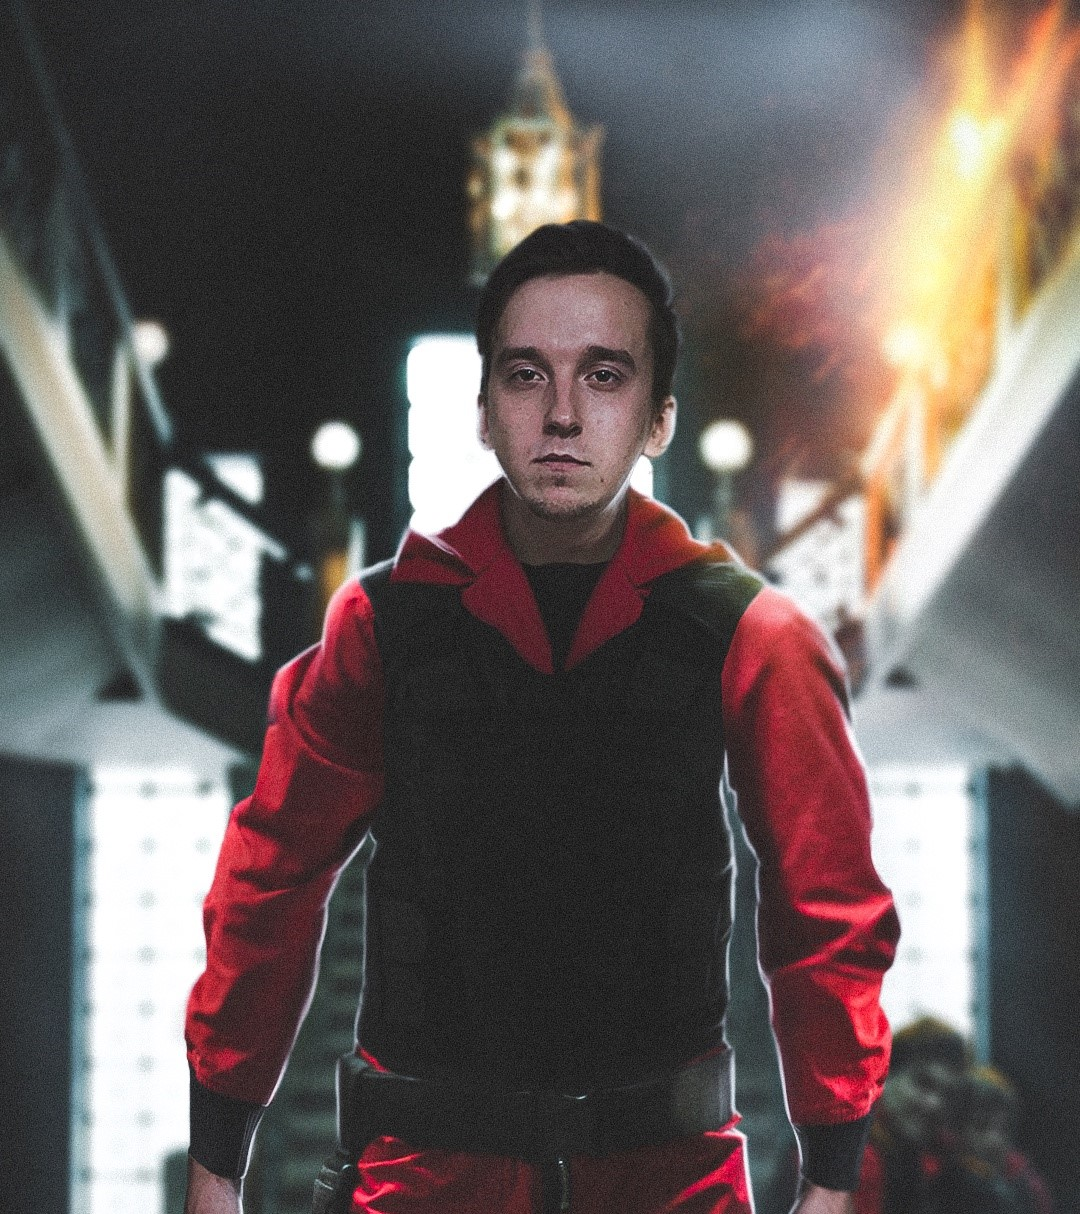

In [ ]:
from IPython.display import Image
Image('/content/drive/My Drive/2.jpg')

In [ ]:
dets_2 = detector(img_src_2, 1)

In [ ]:
for k, d in enumerate(dets_2):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        k, d.left(), d.top(), d.right(), d.bottom()))
    
shape_2 = sp(img_src_2, d)  

Detection 0: Left: 469 Top: 325 Right: 655 Bottom: 511


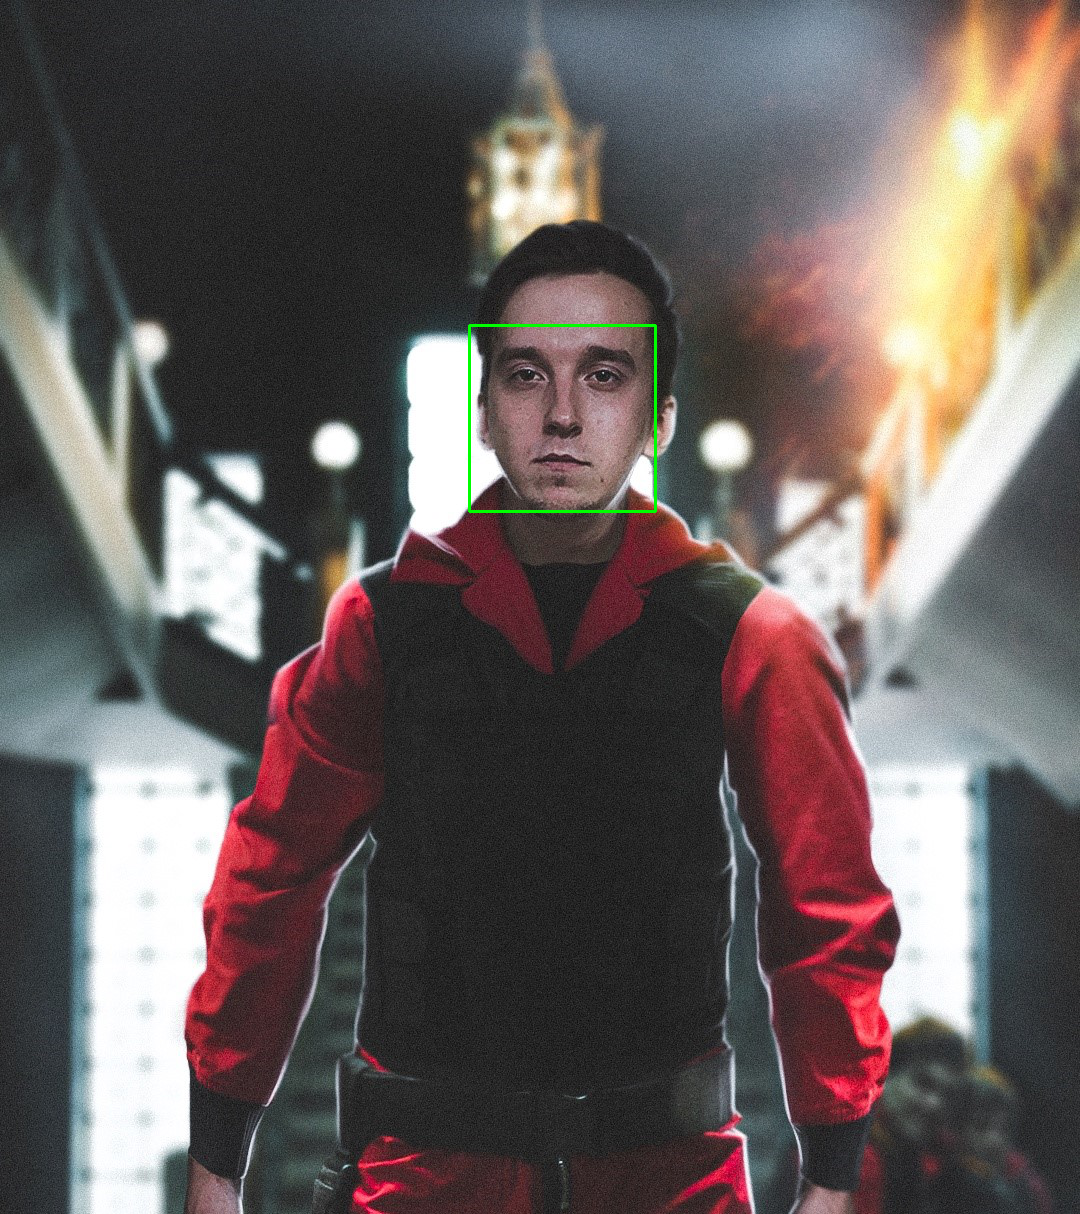

In [ ]:
cv2.rectangle(img_2, (dets_2[0].left(), dets_2[0].top()), (dets_2[0].right(), dets_2[0].bottom()), (0, 255, 0, 255), 2)
img_2 = cv2.cvtColor(img_2, cv2.COLOR_RGB2BGR)
cv2_imshow(img_2)

In [ ]:
face_descriptor2 = facerec.compute_face_descriptor(img_src_2, shape_2)

In [ ]:
a = distance.euclidean(face_descriptor1, face_descriptor2)
print(a)

0.3195029268942532


In [ ]:
img_b     = io.imread('/content/drive/My Drive/3.jpg')
img_src_b = io.imread('/content/drive/My Drive/3.jpg')

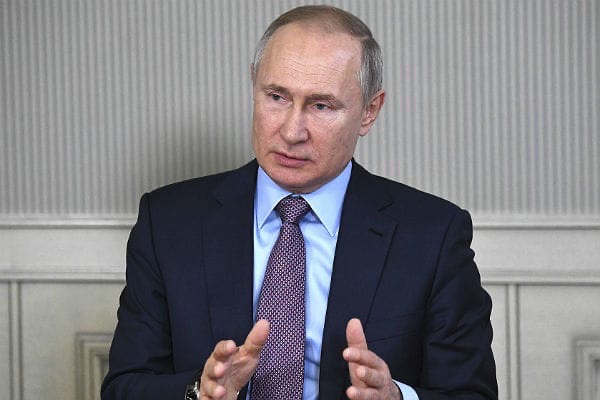

In [ ]:
from IPython.display import Image
Image('/content/drive/My Drive/3.jpg')

In [ ]:
dets_b = detector(img_src_b, 1)

In [ ]:
for k, d in enumerate(dets_b):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        k, d.left(), d.top(), d.right(), d.bottom()))
    
shape_b = sp(img_src_b, d)  

Detection 0: Left: 247 Top: 80 Right: 354 Bottom: 187


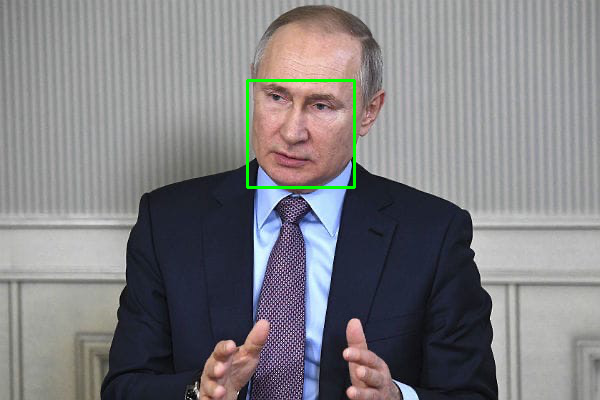

In [ ]:
cv2.rectangle(img_b, (dets_b[0].left(), dets_b[0].top()), (dets_b[0].right(), dets_b[0].bottom()), (0, 255, 0, 255), 2)
img_b = cv2.cvtColor(img_b, cv2.COLOR_RGB2BGR)
cv2_imshow(img_b)

In [ ]:
face_descriptorb = facerec.compute_face_descriptor(img_src_b, shape_b)

In [ ]:
a = distance.euclidean(face_descriptor1, face_descriptorb)
print(a)

0.9084600868254409


In [ ]:
a = distance.euclidean(face_descriptor2, face_descriptorb)
print(a)

0.8960726824675471
